In [1]:
import pandas as pd
import numpy as np


import seaborn as sns

import matplotlib.pyplot as plt

#### Question re overlapping gene scores

In [2]:
# load data and index top genes
expression = pd.read_csv('../../processed_data/all_scores_0825.csv', index_col=0)
celltypes = ['Ex', 'In', 'Ast', 'Mic', 'Oli', 'Opc']
expression = expression[celltypes] # order celltype
index = np.array(np.sum(np.abs(expression)>1.3, axis=1)>2)
genes = np.array(expression.index)[index]
M = np.array(expression.loc[genes])

In [3]:
expression.loc['IL10RB']

Ex     0.252867
In     0.422378
Ast    0.334239
Mic   -0.380969
Oli    0.000000
Opc    2.394317
Name: IL10RB, dtype: float64

In [4]:
frame_pm = pd.read_csv('../../processed_data/pm_kl_frame.csv', index_col=0)


In [5]:
frame_pm[frame_pm['cluster'] == 4]['description'].tolist()

['ATP5F1C',
 'B9D1',
 'BBS4',
 'CASK',
 'CEP162',
 'ICK',
 'IFT122',
 'IFT46',
 'IFT88',
 'KIAA0753',
 'LZTFL1',
 'PSMA2',
 'PSMA5',
 'PSMA6',
 'PSMA7',
 'PSMB1',
 'PSMB2',
 'PSMB3',
 'PSMB5',
 'PSMB7',
 'PSMC1',
 'PSMC2',
 'PSMC3',
 'PSMC4',
 'PSMC5',
 'PSMC6',
 'PSMD1',
 'PSMD11',
 'PSMD12',
 'PSMD13',
 'PSMD14',
 'PSMD3',
 'PSMD4',
 'PSMD5',
 'PSMD6',
 'RAB23',
 'RNF19A',
 'RPGRIP1L',
 'TTC26',
 'TUBB',
 'TXNDC15',
 'UBB',
 'WDR35',
 'Ciliary landscape WP4352',
 'Genes related to primary cilium development (based on CRISPR) WP4536',
 'Parkin-Ubiquitin Proteasomal System pathway WP2359',
 'Proteasome Degradation WP183']

In [6]:
gene_category = {
    "ACTG1": "Cytoskeleton / Structural",
    "ANKLE2": "Development / Morphogenesis",
    "APOD": "Lipid Metabolism",
    "ARMC8": "Proteostasis / Stress Response",
    "ATF7IP2": "Gene Expression / RNA Processing",
    "BANP": "DNA Damage / Repair",
    "BARD1": "DNA Damage / Repair",
    "CBWD5": "Other / Uncharacterized",
    "CETN3": "Cytoskeleton / Structural",
    "CTR9": "Gene Expression / RNA Processing",
    "DDHD2": "Lipid Metabolism",
    "DNAJA1": "Proteostasis / Stress Response",
    "DNASE1": "Metabolism / Enzymes",
    "EXOC2": "Trafficking / Vesicular Transport",
    "HNMT": "Metabolism / Enzymes",
    "HSPH1": "Proteostasis / Stress Response",
    "JAK2": "Signaling",
    "KYAT3": "Metabolism / Enzymes",
    "LDAH": "Lipid Metabolism",
    "LMBR1": "Development / Morphogenesis",
    "LRBA": "Trafficking / Vesicular Transport",
    "MICU1": "Mitochondrial / Energy Homeostasis",
    "MLEC": "Proteostasis / Stress Response",
    "MRI1": "Metabolism / Enzymes",
    "MXD4": "Gene Expression / RNA Processing",
    "MYEF2": "Gene Expression / RNA Processing",
    "NADSYN1": "Metabolism / Enzymes",
    "PDIA3": "Proteostasis / Stress Response",
    "PTGES3": "Proteostasis / Stress Response",
    "PURG": "Gene Expression / RNA Processing",
    "RICTOR": "Signaling",
    "RNASEH2B": "DNA Damage / Repair",
    "RSRP1": "Gene Expression / RNA Processing",
    "SFPQ": "Gene Expression / RNA Processing",
    "SLC17A5": "Transporters",
    "SLC25A25": "Mitochondrial / Energy Homeostasis",
    "SLC30A7": "Transporters",
    "SLC38A2": "Transporters",
    "SNX3": "Trafficking / Vesicular Transport",
    "STIP1": "Proteostasis / Stress Response",
    "TERF2IP": "DNA Damage / Repair",
    "TMEM164": "Other / Uncharacterized",
    "ZBED5": "Gene Expression / RNA Processing",
    "ZNRF1": "Proteostasis / Stress Response"
}

category_colors = {
    "Lipid Metabolism": "#FFA500",                   # Orange
    "Mitochondrial / Energy Homeostasis": "#FFD700",  # Gold
    "DNA Damage / Repair": "#FF0000",                 # Red
    "Proteostasis / Stress Response": "#DDA0DD",       # Plum
    "Signaling": "#32CD32",                           # LimeGreen
    "Gene Expression / RNA Processing": "#1E90FF",    # DodgerBlue
    "Development / Morphogenesis": "#8A2BE2",         # BlueViolet
    "Transporters": "#FF69B4",                        # HotPink
    "Trafficking / Vesicular Transport": "#F4A460",   # SandyBrown
    "Cytoskeleton / Structural": "#808080",           # Gray
    "Metabolism / Enzymes": "#98FB98",                # PaleGreen
    "Other / Uncharacterized": "#C0C0C0"              # Silver
}


In [8]:
import sys
sys.path.append('/Users/djuna/Documents/ABCA7lof2/')

from ABCA7lof2.utils import apply_custom_plot_style
apply_custom_plot_style()

Input sequence provided is already in string format. No operation performed
1 input query terms found no hit:	['CBWD5']
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


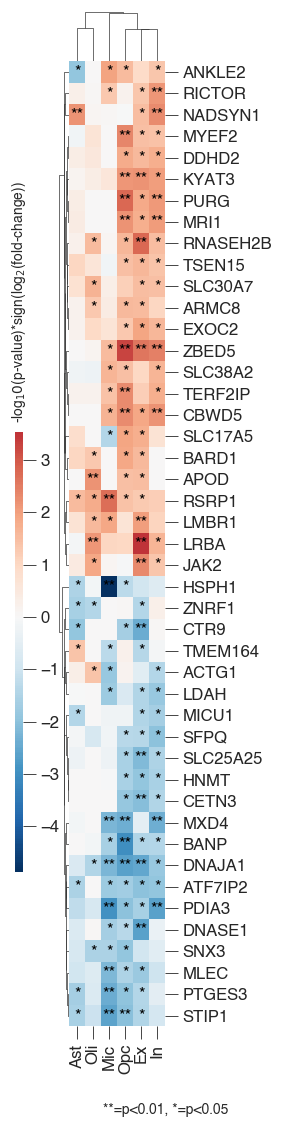

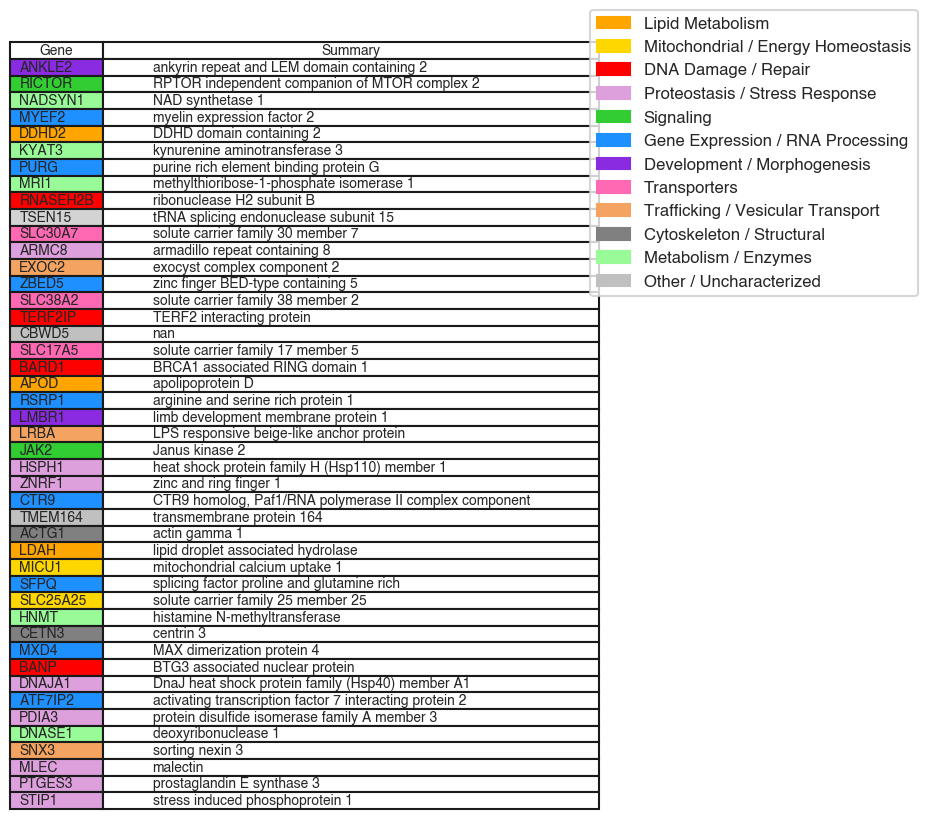

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import mygene
import matplotlib.patches as mpatches


# Initialize the mygene query object
mg = mygene.MyGeneInfo()

# Assume `gene_summaries` is a dictionary with ordered keys matching row order

df = expression.loc[genes]


g = sns.clustermap(df, cmap='RdBu_r', figsize=(2.5, 11),
                   dendrogram_ratio=(.1, .05), cbar_pos=(-.1, .2, .03, .4),
                   xticklabels=True, yticklabels=True, center=0)

g.cax.set_title("-log$_10$(p-value)*sign(log$_2$(fold-change))", pad=10, rotation=90, fontsize=10)
# Add text below the clustermap
plt.figtext(0.5, -0.02, "**=p<0.01, *=p<0.05", ha="center", fontsize=10)

# Rotate the x-axis labels on the heatmap to 90 degrees
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)


# Get the reordered indices for rows and columns after clustering
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

gene_info = mg.querymany(np.array(genes)[row_order], scopes='symbol', fields=['name', 'summary'], species='human')
gene_info = pd.DataFrame(gene_info)
gene_summaries = dict(zip(gene_info['query'], gene_info['name']))

# Annotate each cell if the original value is > 1.3
ax = g.ax_heatmap
for i, row in enumerate(row_order):
    for j, col in enumerate(col_order):
        value = df.iloc[row, col]
        if np.abs(value) > 2:
            ax.text(j + 0.5, i + 0.5, '**', ha='center', va='center', color='black', fontsize=12)

for i, row in enumerate(row_order):
    for j, col in enumerate(col_order):
        value = df.iloc[row, col]
        if (np.abs(value) > 1.3) and (np.abs(value) < 2):
            ax.text(j + 0.5, i + 0.5, '*', ha='center', va='center', color='black', fontsize=12)


# Extract the ordered gene names based on clustering
ordered_gene_names = df.index[row_order]

# Extract corresponding summaries
ordered_summaries = [gene_summaries.get(gene, "N/A") for gene in ordered_gene_names]

plt.savefig("/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/ed3/heatmap_overlap_with_gene_summaries.pdf", dpi=300, bbox_inches='tight')
# Create a new figure for the table
fig, ax = plt.subplots(figsize=(4, len(ordered_summaries) * 0.1))
ax.axis("tight")
ax.axis("off")

# Create a table
table_data = list(zip(ordered_gene_names, ordered_summaries))
table = ax.table(cellText=table_data, colLabels=["Gene", "Summary"], cellLoc='left', loc='left', colWidths=[0.3, 1.6])
table.auto_set_font_size(False)
table.set_fontsize(10)

for i, gene in enumerate(ordered_gene_names):
    category = gene_category.get(gene, "Unknown")  # Default to "Unknown"
    color = category_colors.get(category, "lightgray")  # Get color for category
    cell = table[i + 1, 0]  # +1 because row 0 is header
    cell.set_facecolor(color)
# Show both figures


# --- ADDING A LEGEND FOR CATEGORY COLORS ---
patches = []
for category, color in category_colors.items():
    # Skip "Unknown" if you prefer not to show it
    if category == "Unknown":
        continue
    # Each Patch in the legend displays the color and label
    patch = mpatches.Patch(color=color, label=category)
    patches.append(patch)

# Display the legend
#ax.legend(handles=patches, loc="lower center", bbox_to_anchor=(-.95, -1.05), ncol=2)
ax.legend(handles=patches, loc="lower center", bbox_to_anchor=(.5, .85), ncol=1)

plt.savefig("/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/ed3/overlap_with_gene_summaries_legend.pdf", dpi=300, bbox_inches='tight')

plt.show()


### Additional projections by cell

In [12]:
df = pd.read_csv('../../processed_data/colData.csv')

In [3]:
# df.drop_duplicates(subset='projid', inplace=True)
# df[['seq_batch', 'ABCA7LoF']].value_counts()

seq_batch  ABCA7LoF
JBM        0           14
           1           12
171013Tsa  0           10
Name: count, dtype: int64

In [13]:
df.columns

Index(['Unnamed: 0', 'barcodes', 'index', 'projid', 'sample_id', 'molecule_h5',
       'study', 'pmi', 'age_death', 'msex', 'amyloid', 'ceradsc', 'nft',
       'braaksc', 'cogdx', 'niareagansc', 'ad_reagan', 'apoe_genotype',
       'seq_batch', 'individualID', 'WGSid', 'ABCA7LoF', 'TREM2High',
       'ABCA1High', 'ADAM10High', 'ATP8B4High', 'SORL1High',
       'keep_cells_gaussian', 'predictions', 'gaussian_liklihood',
       'annotations', 'total_counts', 'mito_fractions', 'annotations2',
       'leiden_clusters', 'x', 'y'],
      dtype='object')

In [14]:
dictionary_seq_batch = {'JBM': 'Batch 1', '171013Tsa': 'Batch 2'}
dictionary_msex = {0: 'male', 1: 'female'}
df['seq_batch_renamed'] = df['seq_batch'].map(dictionary_seq_batch)
df['msex_renamed'] = df['msex'].map(dictionary_msex)
df['individual_id'] = df['projid'].astype(str)

In [15]:
import sys
sys.path.append('/Users/djuna/Documents/ABCA7lof2/')

from ABCA7lof2.utils import apply_custom_plot_style
apply_custom_plot_style()

In [16]:
df

,Unnamed: 0,barcodes,index,projid,sample_id,molecule_h5,study,pmi,age_death,msex,...,annotations,total_counts,mito_fractions,annotations2,leiden_clusters,x,y,seq_batch_renamed,msex_renamed,individual_id
0,0,AAACCCAAGTAAACGT-1_0,0,10485914,D20-7432,/home/gridsan/djuna/homer/github/ABCA7lof2/raw...,ROS,6.000000,84.435318,1,...,Opc,8992,0.010454,Opc,7,17.409187,1.188916,Batch 1,female,10485914
1,1,AAACCCACAGAATTCC-1_1,0,10485914,D20-7432,/home/gridsan/djuna/homer/github/ABCA7lof2/raw...,ROS,6.000000,84.435318,1,...,Ast,18140,0.003804,Ast,2,8.327621,17.395287,Batch 1,female,10485914
2,2,AAACGAAAGCACGGAT-1_2,0,10485914,D20-7432,/home/gridsan/djuna/homer/github/ABCA7lof2/raw...,ROS,6.000000,84.435318,1,...,Ex,26948,0.041487,Ex,4,1.738669,6.205430,Batch 1,female,10485914
3,3,AAACGAACATTCACAG-1_3,0,10485914,D20-7432,/home/gridsan/djuna/homer/github/ABCA7lof2/raw...,ROS,6.000000,84.435318,1,...,Ex,51436,0.030290,Ex,3,5.495745,-1.369393,Batch 1,female,10485914
4,4,AAACGCTTCACCGCTT-1_4,0,10485914,D20-7432,/home/gridsan/djuna/homer/github/ABCA7lof2/raw...,ROS,6.000000,84.435318,1,...,Ex,48139,0.052120,Ex,21,13.217752,8.501444,Batch 1,female,10485914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102705,102705,TTTCCTCGTTAAGTAG-1_130525,15,20282398,D17-8786,/home/gridsan/djuna/homer/github/ABCA7lof2/raw...,ROS,4.083333,87.449692,0,...,Ex,36646,0.046226,Ex,21,12.743067,7.049051,Batch 2,male,20282398
102706,102706,TTTGCGCCAGCGTTCG-1_130526,15,20282398,D17-8786,/home/gridsan/djuna/homer/github/ABCA7lof2/raw...,ROS,4.083333,87.449692,0,...,Oli,940,0.010638,Oli,9,-3.440456,1.473599,Batch 2,male,20282398
102707,102707,TTTGCGCTCTTACCTA-1_130527,15,20282398,D17-8786,/home/gridsan/djuna/homer/github/ABCA7lof2/raw...,ROS,4.083333,87.449692,0,...,Ex,27804,0.029672,Ex,15,5.747415,9.389195,Batch 2,male,20282398
102708,102708,TTTGGTTAGACACGAC-1_130528,15,20282398,D17-8786,/home/gridsan/djuna/homer/github/ABCA7lof2/raw...,ROS,4.083333,87.449692,0,...,Oli,2025,0.017284,Oli,0,-7.144191,3.564375,Batch 2,male,20282398


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


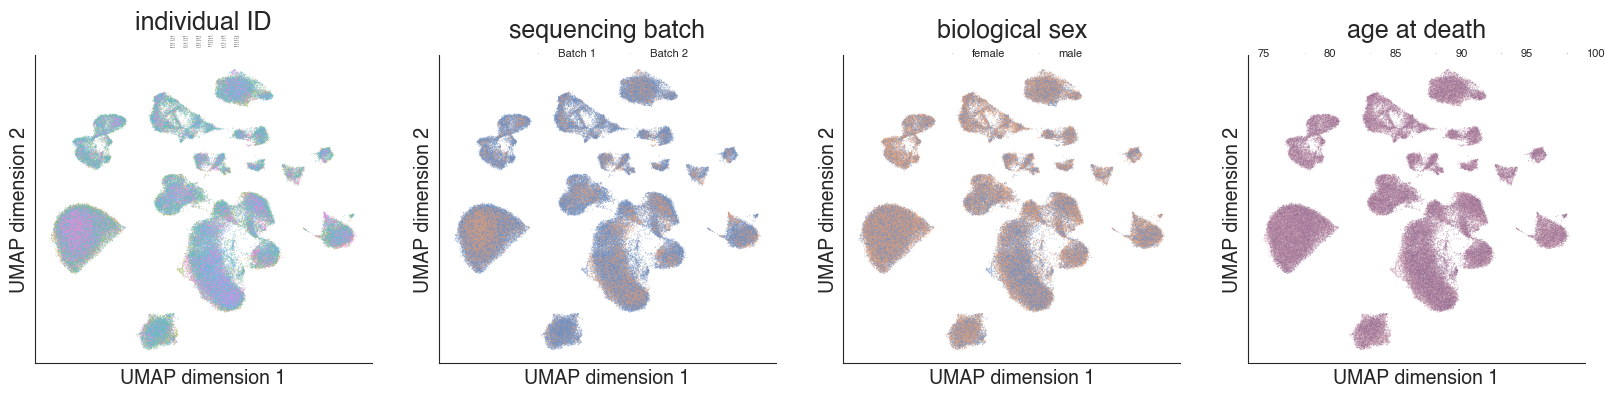

In [18]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
axes = axes.ravel()  
# First plot: using 'msex'
plot_names = ['individual ID', 'sequencing batch', 'biological sex', 'age at death']

for i, name in enumerate(['individual_id','seq_batch_renamed', 'msex_renamed', 'age_death']):
    sns.scatterplot(
        data=df, x='x', y='y', hue=name, s=0.5, alpha=0.5, ax=axes[i]
    )
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel('UMAP dimension 1')
    axes[i].set_ylabel('UMAP dimension 2')
    if name=='individual_id':
        axes[i].legend(title=plot_names[i], loc='upper center', ncol=6,
                bbox_to_anchor=(0.5, 1.15), fontsize=0, frameon=False, markerscale=0)
    else:
        axes[i].legend(title=plot_names[i], loc='upper center', ncol=6,
                bbox_to_anchor=(0.5, 1.15), fontsize=8, frameon=False)

plt.savefig("/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/fs2/additional_projections.pdf", dpi=300, bbox_inches='tight')

### V2 vs V3 impact on cell composition

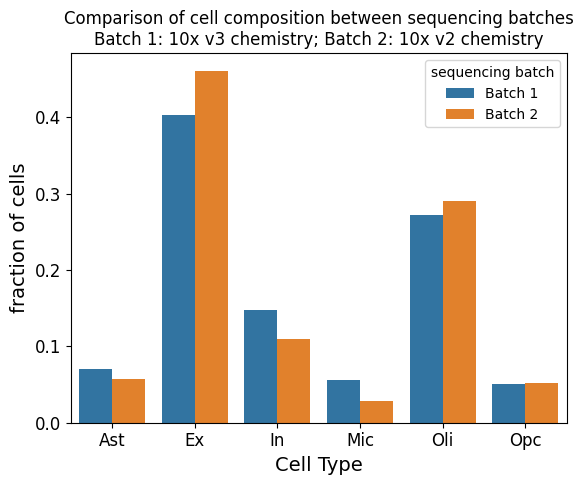

In [265]:
df = pd.read_csv('../../processed_data/colData.csv')

df = pd.crosstab(df['annotations2'], df['seq_batch'])

df_prop = df.div(df.sum())

df_prop_melted = df_prop.reset_index().melt(id_vars='annotations2', var_name='seq_batch', value_name='proportion')
df_prop_melted['sequencing batch'] = df_prop_melted['seq_batch'].apply(lambda x: 'Batch 2' if x == '171013Tsa' else 'Batch 1')
df_prop_melted['sequencing batch'] = pd.Categorical(df_prop_melted['sequencing batch'], categories=['Batch 1', 'Batch 2'], ordered=True)

sns.barplot(x='annotations2', y='proportion', data=df_prop_melted, hue='sequencing batch')
plt.xlabel('Cell Type')
plt.ylabel('fraction of cells')
plt.title('Comparison of cell composition between sequencing batches\nBatch 1: 10x v3 chemistry; Batch 2: 10x v2 chemistry', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Cell Type', fontsize=14)
plt.ylabel('fraction of cells', fontsize=14)
plt.title('Comparison of cell composition between sequencing batches\nBatch 1: 10x v3 chemistry; Batch 2: 10x v2 chemistry', fontsize=12)

plt.savefig("../../paper/extended_plots/composition_comparison.png", dpi=300, bbox_inches='tight')


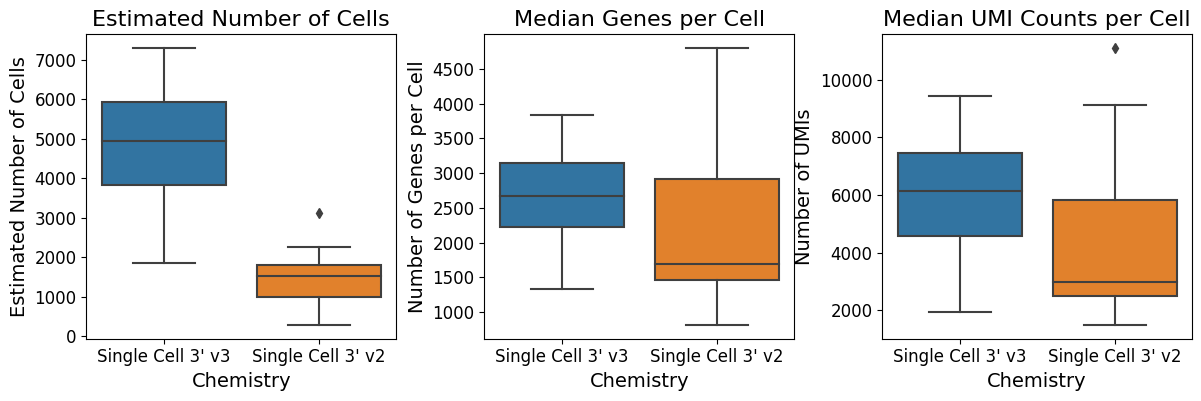

In [262]:
# number of cells per sample, number of genes per cell, number of UMIs

data = pd.read_csv('../../extended_tables/snrnaseq_cellranger_metrics.csv')

data['Estimated Number of Cells'] = pd.to_numeric(data['Estimated Number of Cells'].str.replace(',', ''), errors='coerce')
data['Median Genes per Cell'] = pd.to_numeric(data['Median Genes per Cell'].str.replace(',', ''), errors='coerce')
data['Median UMI Counts per Cell'] = pd.to_numeric(data['Median UMI Counts per Cell'].str.replace(',', ''), errors='coerce')

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1
sns.boxplot(ax=axes[0], x='Chemistry', y='Estimated Number of Cells', data=data)
axes[0].set_title('Estimated Number of Cells')
axes[0].set_xlabel('Chemistry')
axes[0].set_ylabel('Estimated Number of Cells')

# Plot 2
sns.boxplot(ax=axes[1], x='Chemistry', y='Median Genes per Cell', data=data)
axes[1].set_title('Median Genes per Cell')
axes[1].set_xlabel('Chemistry')
axes[1].set_ylabel('Number of Genes per Cell')

# Plot 3
sns.boxplot(ax=axes[2], x='Chemistry', y='Median UMI Counts per Cell', data=data)
axes[2].set_title('Median UMI Counts per Cell')
axes[2].set_xlabel('Chemistry')
axes[2].set_ylabel('Number of UMIs')

plt.tight_layout()
# Increase font sizes
for ax in axes:
    ax.title.set_fontsize(16)
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig("../../paper/extended_plots/number_of_cells_per_sample.png", dpi=300, bbox_inches='tight')


## Score correlations

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

import json

with open("../../processed_data/degs_all.json", "r") as file:
    degs_all = json.load(file)

with open("../../processed_data/degs_JBM.json", "r") as file:
    degs_JBM = json.load(file)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


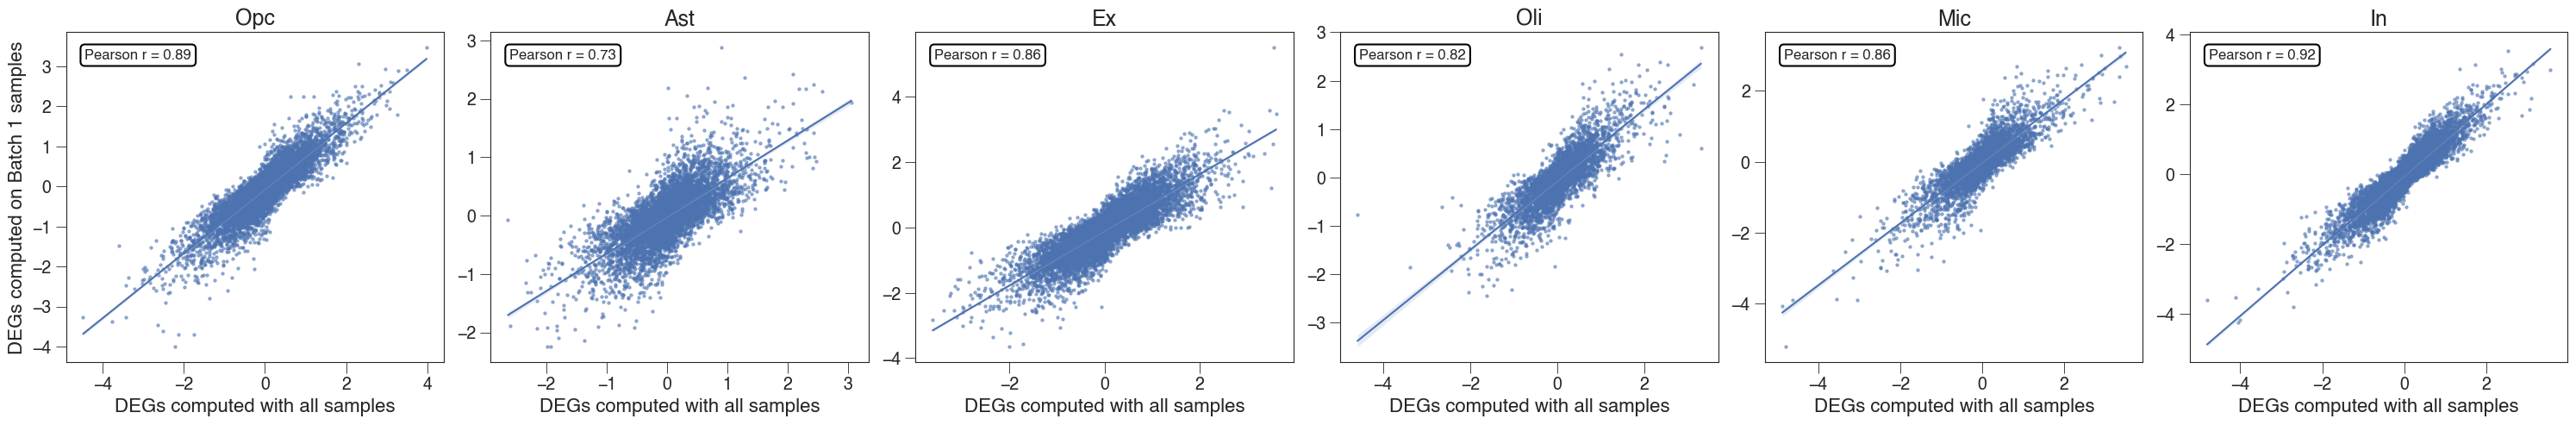

In [20]:
celltypes = degs_all.keys()  # Example cell types
fig, axes = plt.subplots(nrows=1, ncols=int(len(celltypes)), figsize=(10 * int(len(celltypes)/2), 5))
axes = axes.ravel()

for i, celltype in enumerate(celltypes):
    degs_all_opc_df = pd.DataFrame(degs_all[celltype])
    degs_JBM_opc_df = pd.DataFrame(degs_JBM[celltype])
    both = pd.merge(degs_all_opc_df, degs_JBM_opc_df, on='names', how='inner')

    sns.regplot(ax=axes[i], x='scores_x', y='scores_y', data=both, scatter=True, scatter_kws={'s': 5, 'alpha': 0.5})
    pearson_corr = both[['scores_x', 'scores_y']].corr().iloc[0, 1]
    axes[i].annotate(f'Pearson r = {pearson_corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
    axes[i].set_xlabel('DEGs computed with all samples')
    if i == 0:
        axes[i].set_ylabel('DEGs computed on Batch 1 samples')
    else:
        axes[i].set_ylabel('')
    axes[i].set_title(celltype)

plt.tight_layout()

for ax in axes:
    ax.title.set_fontsize(18)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    ax.tick_params(axis='both', which='major', labelsize=14)


plt.savefig("/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/fs2/score_correlations_by_batch.pdf", dpi=300, bbox_inches='tight')


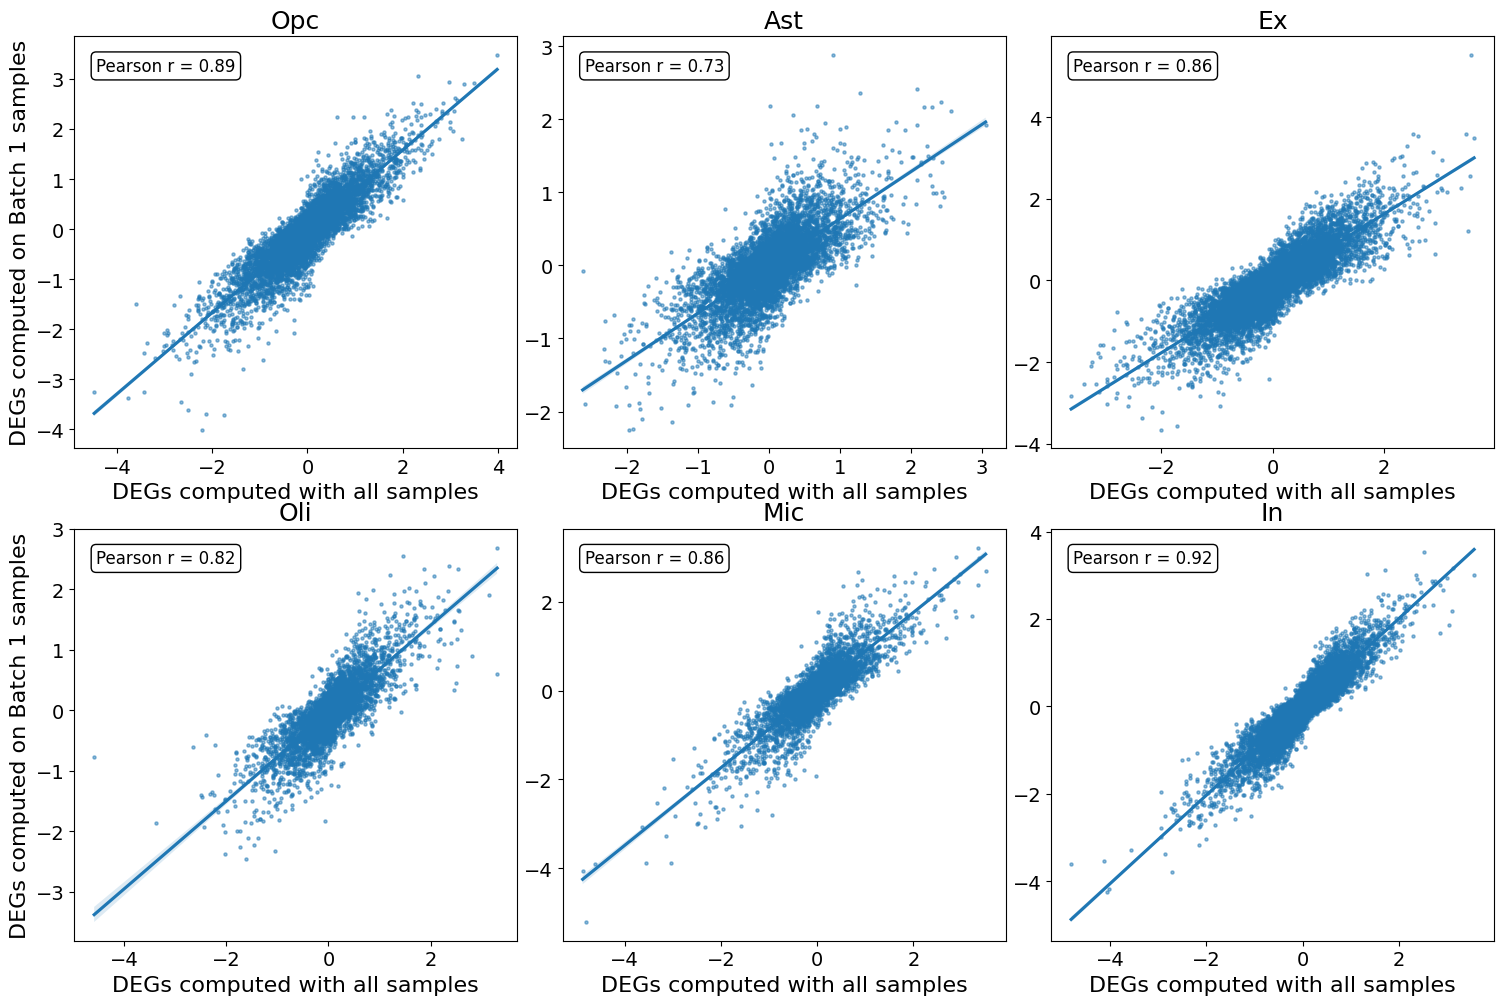

In [6]:
import pandas as pd
celltypes = degs_all.keys()  # Example cell types
fig, axes = plt.subplots(nrows=2, ncols=int(len(celltypes)/2), figsize=(5 * int(len(celltypes)/2), 10))
axes = axes.ravel()

for i, celltype in enumerate(celltypes):
    degs_all_opc_df = pd.DataFrame(degs_all[celltype])
    degs_JBM_opc_df = pd.DataFrame(degs_JBM[celltype])
    both = pd.merge(degs_all_opc_df, degs_JBM_opc_df, on='names', how='inner')

    sns.regplot(ax=axes[i], x='scores_x', y='scores_y', data=both, scatter=True, scatter_kws={'s': 5, 'alpha': 0.5})
    pearson_corr = both[['scores_x', 'scores_y']].corr().iloc[0, 1]
    axes[i].annotate(f'Pearson r = {pearson_corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
    axes[i].set_xlabel('DEGs computed with all samples')
    if (i == 0) or (i == 3):
        axes[i].set_ylabel('DEGs computed on Batch 1 samples')
    else:
        axes[i].set_ylabel('')
    axes[i].set_title(celltype)

plt.tight_layout()

for ax in axes:
    ax.title.set_fontsize(18)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    ax.tick_params(axis='both', which='major', labelsize=14)


plt.savefig("../../paper/extended_plots/score_correlations_by_batch_for_reviewer.png", dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'Ex')

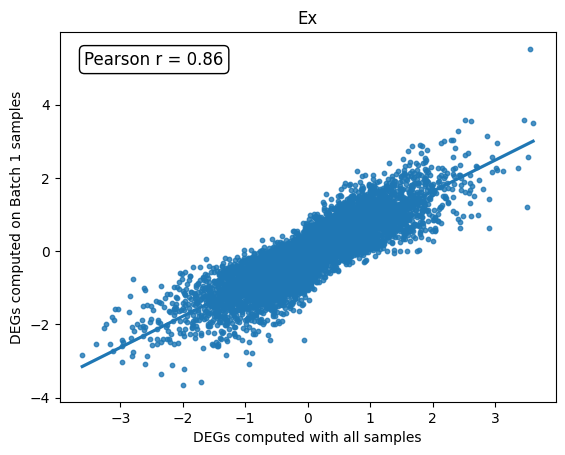

In [290]:

sns.regplot(x='scores_x', y='scores_y', data=both, scatter=True, scatter_kws={'s': 10})
pearson_corr = both[['scores_x', 'scores_y']].corr().iloc[0, 1]
plt.annotate(f'Pearson r = {pearson_corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
plt.xlabel('DEGs computed with all samples')
plt.ylabel('DEGs computed on Batch 1 samples')
plt.title('Ex')

### Additional projections by individual

In [417]:
import pandas as pd
import statsmodels.api as sm
from tqdm import tqdm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# load data
data = pd.read_csv('../../processed_data/av_logcounts_by_ind_full_matrix.csv', index_col=0)
meta = pd.read_csv('../../processed_data/summary.csv', index_col=0)
data_ex = data.filter(like='Ex', axis=1)
data_ex.columns = [int(x.split('.')[1]) for x in data_ex.columns]
meta_ordered = meta.loc[data_ex.columns]

In [418]:
# remove lowly expressed genes
data_ex = data_ex.loc[(data_ex != 0).mean(axis=1) >= 0.9]


In [419]:
# remove batch effect - as linear model residuals
residuals_list = []
for i in tqdm(range(data_ex.shape[0])):
    df = pd.concat([meta_ordered[['seq_batch']], data_ex.iloc[i]], axis=1)
    df.columns = ['seq_batch', 'value']
    dummies = pd.get_dummies(df['seq_batch'], drop_first=True)
    dummies = dummies.astype(float)
    X = sm.add_constant(dummies)
    y = df['value'].values
    model = sm.OLS(y, np.array(X)).fit()
    residuals = model.resid
    residuals_list.append(residuals)

100%|██████████| 14982/14982 [00:12<00:00, 1155.42it/s]


In [420]:
# Stack residuals
D = np.vstack(residuals_list)

# Perform PCA on the residuals
pca = PCA(n_components=2)
principal_components = pca.fit_transform(D.T)
explained_variance_ratio = pca.explained_variance_ratio_

In [421]:
# rename some columns
dictionary_seq_batch = {'JBM': 'Batch 1', '171013Tsa': 'Batch 2'}
meta_ordered['sequencing batch'] = meta_ordered['seq_batch'].map(dictionary_seq_batch)

dictionary_msex = {1: 'male', 0: 'female'}
meta_ordered['biological sex'] = meta_ordered['msex'].map(dictionary_msex)

dictionary_abca7lof = {1: 'ABCA7LoF', 0: 'Control'}
meta_ordered['ABCA7LoF'] = meta_ordered['ABCA7LoF'].map(dictionary_abca7lof)

meta_ordered['APOE genotype'] = meta_ordered['apoe_genotype'].astype(str)

meta_ordered['PMI'] = meta_ordered['pmi']
meta_ordered['Braak stage'] = meta_ordered['braaksc']
meta_ordered['Amyloid'] = meta_ordered['amyloid']
meta_ordered['Age at death'] = meta_ordered['age_death']


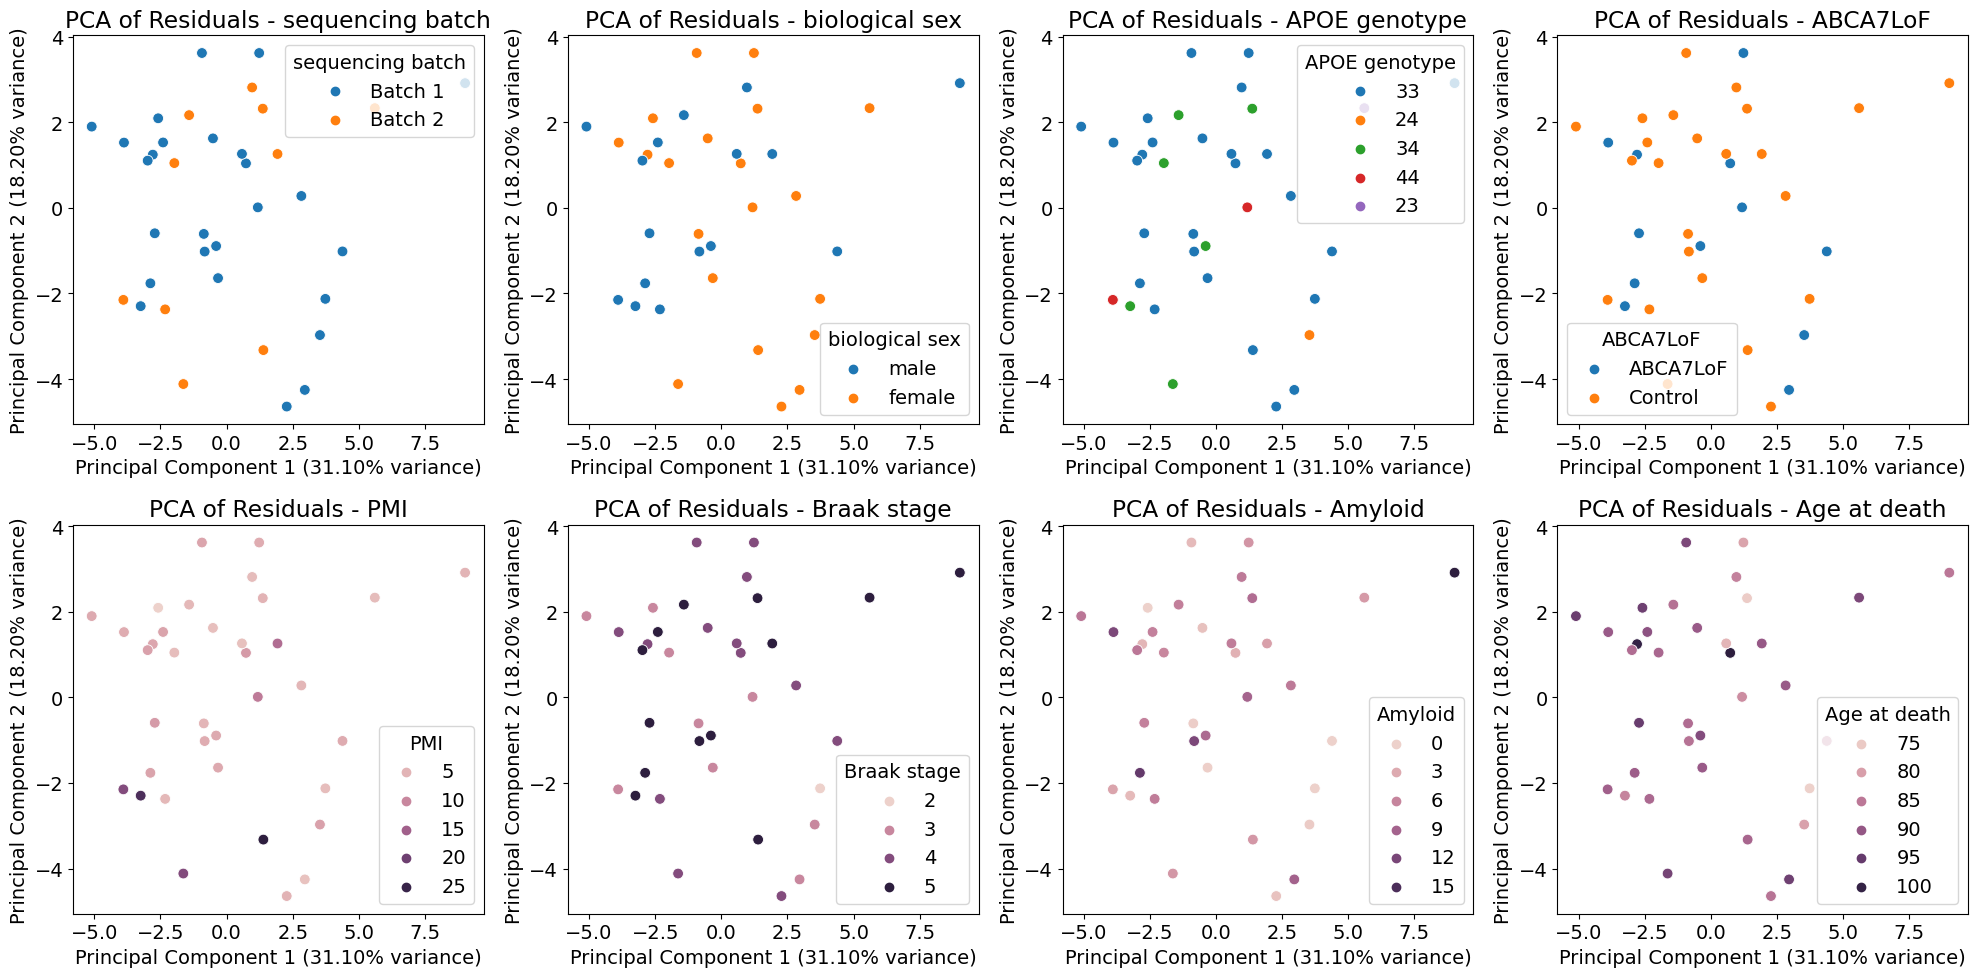

In [422]:
# Plot the first two principal components
plt.figure(figsize=(20, 10))  # Adjust the figure size to accommodate two plots side by side
vars = ['sequencing batch', 'biological sex', 'APOE genotype', 'ABCA7LoF', 'PMI', 'Braak stage', 'Amyloid', 'Age at death']
for i, category in enumerate(vars):
    subset = meta_ordered[meta_ordered['seq_batch'] == category]
    plt.subplot(2, int(len(vars)/2), i + 1)  # Create a subplot for each category
    sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], s=60, hue=meta_ordered.loc[:,category])
    plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]*100:.2f}% variance)')
    plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]*100:.2f}% variance)')
    plt.title(f'PCA of Residuals - {category}')
    plt.legend(title=category, loc='best') 
# Calculate the explained variance ratio

plt.rcParams.update({'font.size': 14})  # Increase the font size of plots

plt.tight_layout()
# Save the figure
plt.savefig('../../paper/extended_plots/PCA_of_Residuals.png', dpi=300, bbox_inches='tight')


## Celltype fraction analysis

In [47]:
import pandas as pd
import statsmodels.formula.api as smf


In [87]:
df = pd.read_csv('../../processed_data/colData.csv')
df['APOE4'] = df['apoe_genotype']>33
df['LOF'] = df['ABCA7LoF']==1
df['seq_batch'] = df['seq_batch']=='JBM'

In [88]:
total_cells = df.groupby('projid').size().reset_index(name='total_cells')
celltype_counts = df.groupby(['projid', 'annotations2']).size().reset_index(name='celltype_count')
summary = pd.merge(celltype_counts, total_cells, on='projid')
summary['proportion'] = summary['celltype_count'] / summary['total_cells']
sample_meta_cols = ['projid','LOF', 'amyloid', 'nft', 'msex', 'age_death', 'pmi', 'seq_batch', 'APOE4']
sample_meta = df[sample_meta_cols].drop_duplicates()
summary = pd.merge(summary, sample_meta, on='projid', how='left')


In [92]:
summary['seq_batch'] = summary['seq_batch'].astype(float)
summary['msex'] = summary['msex'].astype(float)
summary['APOE4'] = summary['APOE4'].astype(float)
summary['LOF'] = summary['LOF'].astype(float)
summary['amyloid'] = summary['amyloid'].astype(float)
summary['nft'] = summary['nft'].astype(float)
summary['age_death'] = summary['age_death'].astype(float)
summary['pmi'] = summary['pmi'].astype(float)


In [120]:
outs = []
for i in summary['annotations2'].unique():
    data = summary[summary['annotations2']==i]
    model = smf.glm(
        formula="proportion ~ LOF + amyloid + nft + msex + age_death + pmi + seq_batch + APOE4",
        data=data,
        family=sm.families.Binomial()
    )

    # Adjust the dispersion parameter using the Pearson chi-square statistic (scale='X2')
    result = model.fit(scale='X2')
    outs.append(result.pvalues['LOF'])

In [127]:
d = pd.DataFrame({'pvalues': outs, 'annotations2': summary['annotations2'].unique()})

latex_table = d.to_latex(index=False)
latex_table

'\\begin{tabular}{rl}\n\\toprule\npvalues & annotations2 \\\\\n\\midrule\n0.974010 & Ast \\\\\n0.547938 & Ex \\\\\n0.102002 & In \\\\\n0.502967 & Mic \\\\\n0.942275 & Oli \\\\\n0.294483 & Opc \\\\\n\\bottomrule\n\\end{tabular}\n'

In [128]:
d

,pvalues,annotations2
0,0.974010,Ast
1,0.547938,Ex
2,0.102002,In
3,0.502967,Mic
4,0.942275,Oli
5,0.294483,Opc
